In [36]:
#Import dependencies
import pandas as pd
import os
from path import Path
import numpy as np

In [37]:
#Read in the file
file_path = Path('Data/Data_Combined_for_ipynb.xlsx')
weather_data_df = pd.read_excel(file_path)                 
weather_data_df.head()                   

,year,city,country,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp
0,1743,Ljubljana,Slovenia,5.49,1.55,NaN,NaN,NaN
1,1744,Ljubljana,Slovenia,11.06,6.32,NaN,NaN,NaN
2,1745,Ljubljana,Slovenia,2.30,-5.95,NaN,NaN,NaN
3,1746,Ljubljana,Slovenia,NaN,0.00,NaN,NaN,NaN
4,1747,Ljubljana,Slovenia,NaN,0.00,NaN,NaN,NaN


In [38]:
# Check the shape
weather_data_df.shape

(271, 8)

In [39]:
# Drop the uneccesary columns
weather_data_df = weather_data_df.drop(columns=['city','country'])

In [40]:
# Drop the null rows
weather_data_df = weather_data_df.dropna()

In [41]:
# Check the shape
weather_data_df.shape

(165, 6)

In [42]:
# Check the weather data.
df = weather_data_df 
df.head() 

,year,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp
106,1849,9.07,3.30,21.03,14.12,7.98
107,1850,8.64,3.57,21.21,13.80,7.90
108,1851,8.72,4.48,21.33,14.39,8.18
109,1852,9.50,3.29,21.28,13.81,8.10
110,1853,8.99,4.25,21.78,14.40,8.04


In [43]:
# Calculate the moving average in Python - 5 year MA (slinding window)
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3_TEST'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)


In [44]:
df.head() 

,year,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp,SMA_3
106,1849,9.07,3.30,21.03,14.12,7.98,NaN
107,1850,8.64,3.57,21.21,13.80,7.90,NaN
108,1851,8.72,4.48,21.33,14.39,8.18,8.8
109,1852,9.50,3.29,21.28,13.81,8.10,9.0
110,1853,8.99,4.25,21.78,14.40,8.04,9.1


In [45]:
# Using Pandas rolling window function
df['pandas_SMA_3_TEST'] = df.iloc[:,1].rolling(window=5).mean()

In [46]:
df.head() 

,year,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp,SMA_3,pandas_SMA_3
106,1849,9.07,3.30,21.03,14.12,7.98,NaN,NaN
107,1850,8.64,3.57,21.21,13.80,7.90,NaN,NaN
108,1851,8.72,4.48,21.33,14.39,8.18,8.8,NaN
109,1852,9.50,3.29,21.28,13.81,8.10,9.0,NaN
110,1853,8.99,4.25,21.78,14.40,8.04,9.1,8.984


In [63]:
# Calculate moving averages all cities and global data with proper column name
df['LJ_MA_5y'] = df.iloc[:,1].rolling(window=5).mean()
df['LJ_MA_10y'] = df.iloc[:,1].rolling(window=10).mean()
df['HE_MA_5y'] = df.iloc[:,2].rolling(window=5).mean()
df['GU_MA_5y'] = df.iloc[:,3].rolling(window=5).mean()
df['SF_MA_5y'] = df.iloc[:,4].rolling(window=5).mean()
df['GLOBAL_MA_5y'] = df.iloc[:,5].rolling(window=5).mean()

In [64]:
df.head() 

,year,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp,SMA_3,pandas_SMA_3,LJ_MA_5y,HE_MA_5y,GU_MA_5y,SF_MA_5y,GLOBAL_MA_5y,LJ_MA_10y
106,1849,9.07,3.30,21.03,14.12,7.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,1850,8.64,3.57,21.21,13.80,7.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,1851,8.72,4.48,21.33,14.39,8.18,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,1852,9.50,3.29,21.28,13.81,8.10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,1853,8.99,4.25,21.78,14.40,8.04,9.1,8.984,8.984,3.778,21.326,14.104,8.04,NaN


In [65]:
# Import Dependencies for Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

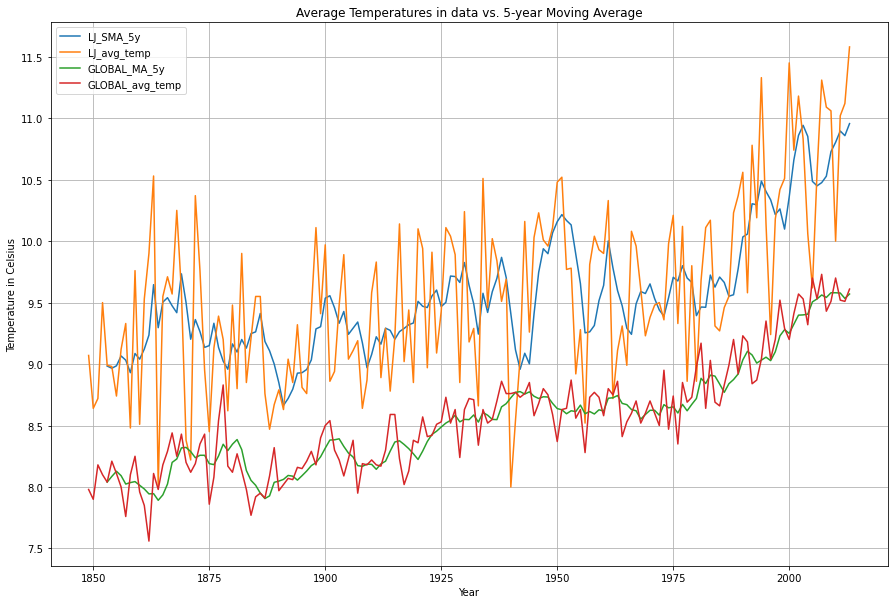

In [66]:
# Plot the averages
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['year'], df['LJ_MA_5y'],label='LJ_SMA_5y')
plt.plot(df['year'], df['LJ_avg_temp'],label='LJ_avg_temp')
plt.plot(df['year'], df['GLOBAL_MA_5y'],label='GLOBAL_MA_5y')
plt.plot(df['year'], df['GLOBAL_avg_temp'],label='GLOBAL_avg_temp')
plt.legend(loc=2)

# Plot the axis

# Create labels for the x and y axes.
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

# Create a title.
plt.title("Average Temperatures in data vs. 5-year Moving Average")

# Show the plot
plt.show()

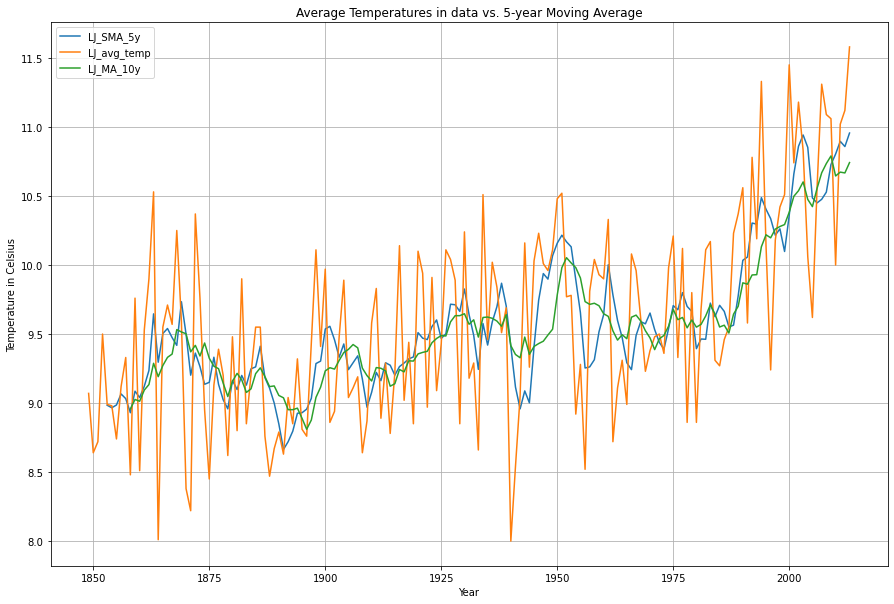

In [68]:
# Plot the averages - Ljubljana original data, 5-year and 10-year Moving Average
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['year'], df['LJ_MA_5y'],label='LJ_SMA_5y')
plt.plot(df['year'], df['LJ_avg_temp'],label='LJ_avg_temp')
plt.plot(df['year'], df['LJ_MA_10y'],label='LJ_MA_10y')
plt.legend(loc=2)

# Plot the axis

# Create labels for the x and y axes.
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

# Create a title.
plt.title("Average Temperatures in data vs. 5-year Moving Average")

# Show the plot
plt.show()